In [1]:
import os
import sys
sys.path.append(os.path.join(os.getcwd(), '../../../'))

os.environ['HF_ENDPOINT'] = 'https://hf-mirror.com'
os.environ['CUDA_VISIBLE_DEVICES'] = '3'
os.environ['HOME'] = '/data25/wuqin'

In [5]:
import torch
from src.arguments import ModelArguments, DataArguments
from src.model.model import MMEBModel
from src.model.processor import load_processor, QWEN2_VL, VLM_IMAGE_TOKENS, Qwen2_VL_process_fn
from src.utils import batch_to_device
from experiments.examples.qwen2vl.utils import show_tensor_image, split_to_grid, show_grid, tensor2pil
from experiments.examples.qwen2vl.vggt_utils import load_and_preprocess_images


# 初始化模型
model_args = ModelArguments(
    model_name='VLM2Vec/VLM2Vec-V2.0',
    pooling='last',
    normalize=True,
    model_backbone='qwen2_vl',
    lora=True
)
data_args = DataArguments()

processor = load_processor(model_args, data_args)
model = MMEBModel.load(model_args)
model = model.to('cuda', dtype=torch.bfloat16)
model = model.eval()

[2025-07-31 09:25:28,601] DEBUG [git.cmd:1270] Popen(['git', 'version'], cwd=/data25/wuqin/projects/VLM2Vec/experiments/examples/qwen2vl, stdin=None, shell=False, universal_newlines=False)
[2025-07-31 09:25:28,607] DEBUG [git.cmd:1270] Popen(['git', 'version'], cwd=/data25/wuqin/projects/VLM2Vec/experiments/examples/qwen2vl, stdin=None, shell=False, universal_newlines=False)
/data25/wuqin/miniforge3/envs/vlm2vec/lib/python3.11/site-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
[2025-07-31 09:25:29,151] DEBUG [matplotlib:342] matplotlib data path: /data25/wuqin/miniforge3/envs/vlm2vec/lib/python3.11/site-packages/matplotlib/mpl-data
[2025-07-31 09:25:29,159] DEBUG [matplotlib:342] CONFIGDIR=/data25/wuqin/.config/matplotlib
[2025-07-31 09:25:29,172] DEBUG [matplotlib:1557] interactive is False

DropoutAddRMSNorm of flash_attn is not installed!!!


[2025-07-31 09:25:29,608] INFO [src.utils:21] Loading processor from: VLM2Vec/VLM2Vec-V2.0
[2025-07-31 09:25:30,363] DEBUG [urllib3.connectionpool:544] https://hf-mirror.com:443 "HEAD /VLM2Vec/VLM2Vec-V2.0/resolve/main/preprocessor_config.json HTTP/1.1" 307 0
[2025-07-31 09:25:30,475] DEBUG [urllib3.connectionpool:544] https://hf-mirror.com:443 "HEAD /api/resolve-cache/models/VLM2Vec/VLM2Vec-V2.0/e39ff079b8275ef876d3656da8c0bddbff3c4dde/preprocessor_config.json HTTP/1.1" 200 0
[2025-07-31 09:25:30,986] DEBUG [urllib3.connectionpool:544] https://hf-mirror.com:443 "HEAD /VLM2Vec/VLM2Vec-V2.0/resolve/main/tokenizer_config.json HTTP/1.1" 307 0
[2025-07-31 09:25:31,099] DEBUG [urllib3.connectionpool:544] https://hf-mirror.com:443 "HEAD /api/resolve-cache/models/VLM2Vec/VLM2Vec-V2.0/e39ff079b8275ef876d3656da8c0bddbff3c4dde/tokenizer_config.json HTTP/1.1" 200 0
[2025-07-31 09:25:31,374] DEBUG [urllib3.connectionpool:544] https://hf-mirror.com:443 "GET /api/models/VLM2Vec/VLM2Vec-V2.0/tree/mai

In [7]:
from vggt_utils import load_and_preprocess_images
img = load_and_preprocess_images(["/data25/wuqin/projects/FlagEmbedding/research/visual_bge/vl_query_samples/imgs/test1.jpg"])
print(img.shape)

[2025-07-31 09:27:27,846] DEBUG [PIL.TiffImagePlugin:942] tag: ImageWidth (256) - type: long (4) - value: b'\x00\x00\x10\x00'
[2025-07-31 09:27:27,847] DEBUG [PIL.TiffImagePlugin:942] tag: ImageLength (257) - type: long (4) - value: b'\x00\x00\x0c\x00'
[2025-07-31 09:27:27,848] DEBUG [PIL.TiffImagePlugin:942] tag: YCbCrPositioning (531) - type: short (3) - value: b'\x00\x01'
[2025-07-31 09:27:27,848] DEBUG [PIL.TiffImagePlugin:942] tag: ExifIFD (34665) - type: long (4) - value: b'\x00\x00\x00V'
[2025-07-31 09:27:27,849] DEBUG [PIL.TiffImagePlugin:942] tag: Orientation (274) - type: short (3) - value: b'\x00\x01'
[2025-07-31 09:27:27,849] DEBUG [PIL.TiffImagePlugin:942] tag: ResolutionUnit (296) - type: short (3) - value: b'\x00\x02'


torch.Size([1, 3, 392, 518])


[2025-07-31 09:27:39,390] DEBUG [matplotlib.pyplot:497] Loaded backend module://matplotlib_inline.backend_inline version unknown.
[2025-07-31 09:27:39,392] DEBUG [matplotlib.pyplot:497] Loaded backend module://matplotlib_inline.backend_inline version unknown.
[2025-07-31 09:27:39,396] DEBUG [matplotlib.font_manager:1471] findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
[2025-07-31 09:27:39,397] DEBUG [matplotlib.font_manager:1483] findfont: score(FontEntry(fname='/data25/wuqin/miniforge3/envs/vlm2vec/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif-Italic.ttf', name='DejaVu Serif', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
[2025-07-31 09:27:39,398] DEBUG [matplotlib.font_manager:1483] findfont: score(FontEntry(fname='/data25/wuqin/miniforge3/envs/vlm2vec/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizOneSymReg.ttf', name='STIXSizeOneSym', style='nor

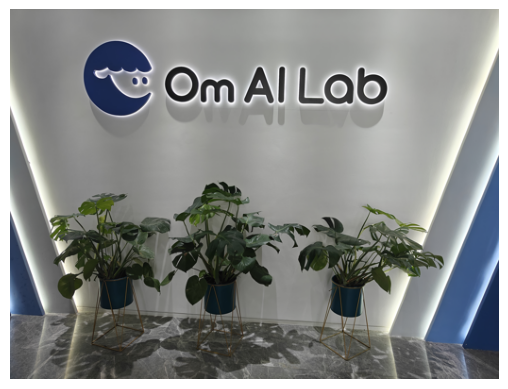

In [8]:
from utils import show_tensor_image
show_tensor_image(img)

In [9]:
from utils import tensor2pil
prompt = "识别中所有的植物，输出其框坐标(xy, xy)"
inputs = processor(text=f'{VLM_IMAGE_TOKENS[QWEN2_VL]} {prompt}',
                images=tensor2pil(img[0]),
                return_tensors="pt")
inputs = {key: value.to('cuda') for key, value in inputs.items()}
inputs['pixel_values'] = inputs['pixel_values'].unsqueeze(0)
inputs['image_grid_thw'] = inputs['image_grid_thw'].unsqueeze(0)
with torch.no_grad():
    outputs = model.encoder.generate(**inputs, max_new_tokens=256)

In [17]:
print(inputs['input_ids'].shape, outputs.shape)

torch.Size([1, 266]) torch.Size([1, 522])


In [19]:
generated_ids_trimmed = [
    out_ids[len(in_ids) :] for in_ids, out_ids in zip(inputs['input_ids'], outputs)
]
output_text = processor.batch_decode(
    generated_ids_trimmed, skip_special_tokens=True, clean_up_tokenization_spaces=False
)
print(output_text)

['坐标((-0.08, -0.08) (-0.18, -0.18) (-0.18, -0.18) (-0.08, -0.08) (-0.18, -0.18) (-0.18, -0.18) (-0.08, -0.08) (-0.08, -0.08) (-0.08, -0.08) (-0.08, -0.08) (-0.08, -0.08) (-0.08, -0.08) (-0.08, -0.08) (-0.08, -0.08) (-0.08, -0.08) (-0.08, -0.08) (-0.08, -0.08) (-0.08, -0.08) (-0.08, -0.08) (-0.08, -0.08) (-0.08, -0.08) (-0.']
